<a href="https://colab.research.google.com/github/AnisimovaPV/Z/blob/main/L_1_Sale_ipynb%22%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline



# **Информация о данных**

Датасет содержит информацию о черной пятнице. Розничная компания «ABC Private Limited» хочет понять покупательское поведение клиентов (в частности, сумму покупки) в отношении различных продуктов разных категорий. Они поделились сводкой о покупках различных клиентов для выбранных крупносерийных продуктов за последний месяц.
Набор данных также содержит демографические данные клиентов (возраст, пол, семейное положение, тип города, пребывание в текущем городе), сведения о продукте (идентификатор продукта и категория продукта) и общую сумму покупки за последний месяц. По признакам необходимо узнать, кто совершил покупку(мужчина или женщина)

# **Загрузка данных**

In [ ]:
data_s = pd.read_csv("https://raw.githubusercontent.com/AnisimovaPV/Z/main/train.csv")

Вывод количества строк и столбцов

In [ ]:
data_s.shape

(550068, 12)

In [ ]:
data_s.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


Каждая строка соответсвует одному автомобилю. Столбцы (признаки):
1. brand- марка машины
2. name - модель машины
3. bodyType - Тип кузова автомобиля
4. color - цвет машины
5. fuelType - тип топлива 
6. year - Год выпуска автомобиля
7. mileage - пробег 
8. transmission -Тип трансмиссии машины
9. power - Лошадиные силы
10. price - Цена в российских рублях
11. vehicleConfiguration - Название конфигурации модели автомобиля
12. engineName - Название двигателя
13. engineDisplacement - Объем двигателя в литрах
14. date - Дата публикации объявления
15. location - Город объявления
16. link - ссылка на сайт
17. parse_date - Дата и время получения информации об объявлении

In [ ]:
type(data_s)

pandas.core.frame.DataFrame

Подробное описание таблицы:

In [ ]:
data_s.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [ ]:
data_s.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

**Обработка категориальных признаков**

Заменим тип Object некоторых признаков на специальный тип, который предназначен для хранения категориальных значений

In [ ]:
data_s['Gender'] = data_s['Gender'].astype('category')
data_s['Age'] = data_s['Age'].astype('category')
data_s['City_Category'] = data_s['City_Category'].astype('category')
data_s['Stay_In_Current_City_Years'] = data_s['Stay_In_Current_City_Years'].astype('category')

In [ ]:
data_s['Gender'].dtype

CategoricalDtype(categories=['F', 'M'], ordered=False)

In [ ]:
data_s['Age'].dtype

CategoricalDtype(categories=['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+'], ordered=False)

In [ ]:
data_s['City_Category'].dtype


CategoricalDtype(categories=['A', 'B', 'C'], ordered=False)

In [ ]:
data_s['Stay_In_Current_City_Years'] = data_s['Stay_In_Current_City_Years'].replace("Free", np.nan , regex=True)
data_s['Stay_In_Current_City_Years'] = data_s['Stay_In_Current_City_Years'].apply(lambda v: float(str(v).replace("+","")))
data_s['Stay_In_Current_City_Years'] = data_s['Stay_In_Current_City_Years'].astype('float')
data_s['Stay_In_Current_City_Years'].dtype

dtype('float64')

In [ ]:
data_s['Stay_In_Current_City_Years'].dtype

dtype('float64')

In [ ]:
data_s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   User_ID                     550068 non-null  int64   
 1   Product_ID                  550068 non-null  object  
 2   Gender                      550068 non-null  category
 3   Age                         550068 non-null  category
 4   Occupation                  550068 non-null  int64   
 5   City_Category               550068 non-null  category
 6   Stay_In_Current_City_Years  550068 non-null  float64 
 7   Marital_Status              550068 non-null  int64   
 8   Product_Category_1          550068 non-null  int64   
 9   Product_Category_2          376430 non-null  float64 
 10  Product_Category_3          166821 non-null  float64 
 11  Purchase                    550068 non-null  int64   
dtypes: category(3), float64(3), int64(5), object(1)
memory usa

# **Обработка выбросов**

Построим графики зависимостей, чтобы оценить количество выбросов

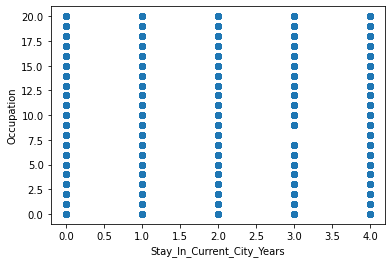

In [ ]:
plt.scatter(data_s['Stay_In_Current_City_Years'], data_s['Occupation'], alpha=1)
plt.xlabel('Stay_In_Current_City_Years')
plt.ylabel('Occupation')
pass

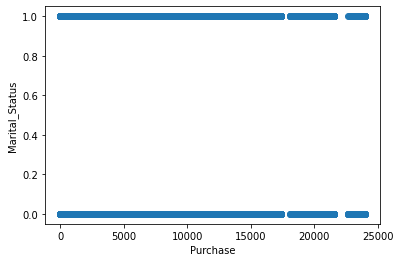

In [ ]:
plt.scatter(data_s['Purchase'], data_s['Marital_Status'], alpha=1)
plt.xlabel('Purchase')
plt.ylabel('Marital_Status')
pass

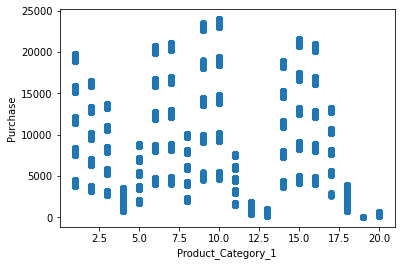

In [ ]:
plt.scatter(data_s['Product_Category_1'], data_s['Purchase'], alpha=1)
plt.xlabel('Product_Category_1')
plt.ylabel('Purchase')
pass

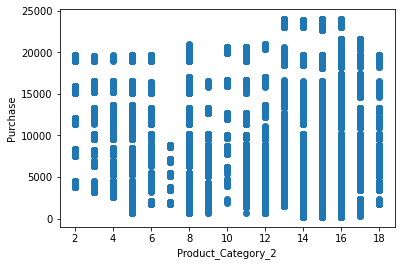

In [ ]:
plt.scatter(data_s['Product_Category_2'], data_s['Purchase'], alpha=1)
plt.xlabel('Product_Category_2')
plt.ylabel('Purchase')
pass

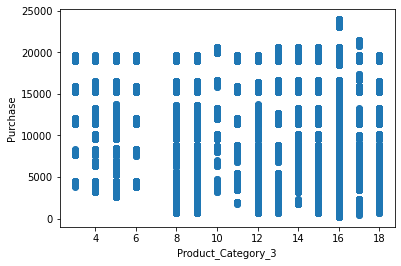

In [ ]:
plt.scatter(data_s['Product_Category_3'], data_s['Purchase'], alpha=1)
plt.xlabel('Product_Category_3')
plt.ylabel('Purchase')
pass

Нужно найти квантили для этих признаков

In [ ]:
data_s['Purchase'].quantile([.1,.5,.70, .90, .95, .999, 1])

0.100     3540.0
0.500     8047.0
0.700    11528.0
0.900    16317.0
0.950    19336.0
0.999    23729.0
1.000    23961.0
Name: Purchase, dtype: float64

In [ ]:
data_s['Product_Category_1'].quantile([.1,.5,.70, .90, .95, .999, 1])

0.100     1.0
0.500     5.0
0.700     8.0
0.900    11.0
0.950    13.0
0.999    20.0
1.000    20.0
Name: Product_Category_1, dtype: float64

In [ ]:
data_s['Product_Category_2'].quantile([.1,.5,.70, .90, .95, .999, 1])

0.100     2.0
0.500     9.0
0.700    14.0
0.900    16.0
0.950    16.0
0.999    18.0
1.000    18.0
Name: Product_Category_2, dtype: float64

In [ ]:
data_s['Product_Category_3'].quantile([.1,.5,.70, .90, .95, .999, 1])

0.100     5.0
0.500    14.0
0.700    16.0
0.900    17.0
0.950    17.0
0.999    18.0
1.000    18.0
Name: Product_Category_3, dtype: float64

Избавимся от строк с большими значение которых превышает 0,995 квантиля.



In [ ]:
rows_to_drop = data_s[
    (data_s['Product_Category_1'] > data_s['Product_Category_1'].quantile(0.995)) | 
    (data_s['Product_Category_2'] > data_s['Product_Category_2'].quantile(0.995)) | 
    (data_s['Product_Category_3']  > data_s['Product_Category_3' ].quantile(0.995))| 
    (data_s['Purchase']  > data_s['Purchase' ].quantile(0.995))].index
    
data_s = data_s.drop(rows_to_drop)
data_s.shape

(544768, 12)

# **Визуализация и получение основных характеристик**

In [ ]:
data_s.describe()

,User_ID,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.447680e+05,544768.000000,544768.000000,544768.000000,544768.000000,374132.000000,166180.000000,544768.000000
mean,1.003028e+06,8.074090,1.858569,0.409433,5.309216,9.813480,12.655350,9235.304572
std,1.727278e+03,6.522524,1.289540,0.491730,3.805348,5.087768,4.128044,4911.594911
min,1.000001e+06,0.000000,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,1.000000,0.000000,1.000000,5.000000,9.000000,5840.000000
50%,1.003075e+06,7.000000,2.000000,0.000000,5.000000,9.000000,14.000000,8046.000000
75%,1.004478e+06,14.000000,3.000000,1.000000,8.000000,15.000000,16.000000,12029.000000
max,1.006040e+06,20.000000,4.000000,1.000000,19.000000,18.000000,18.000000,21352.000000


In [ ]:
data_s.describe(include=['category'])

,Gender,Age,City_Category
count,544768,544768,544768
unique,2,7,3
top,M,26-35,B
freq,410285,217734,229334


# **Вычислим матрицу корреляции**

In [ ]:
corr_matrix = data_s.corr()
corr_matrix

,User_ID,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
User_ID,1.000000,-0.024150,-0.030770,0.020452,0.003668,0.001179,0.003432,0.004251
Occupation,-0.024150,1.000000,0.030274,0.024150,-0.008762,-0.000682,0.013087,0.020662
Stay_In_Current_City_Years,-0.030770,0.030274,1.000000,-0.012750,-0.004103,-0.001604,0.002203,0.005657
Marital_Status,0.020452,0.024150,-0.012750,1.000000,0.019916,0.014810,0.019194,-0.001321
Product_Category_1,0.003668,-0.008762,-0.004103,0.019916,1.000000,0.537271,0.224602,-0.354346
Product_Category_2,0.001179,-0.000682,-0.001604,0.014810,0.537271,1.000000,0.542036,-0.229619
Product_Category_3,0.003432,0.013087,0.002203,0.019194,0.224602,0.542036,1.000000,-0.029615
Purchase,0.004251,0.020662,0.005657,-0.001321,-0.354346,-0.229619,-0.029615,1.000000


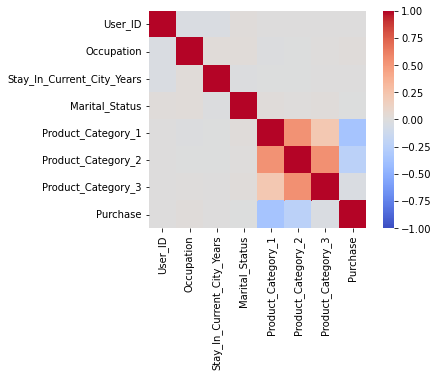

In [ ]:
sns.heatmap(corr_matrix, square=True, cmap='coolwarm', vmin=-1.0, vmax=1.0)
pass

In [ ]:
data_s['Gender'].value_counts()

M    410285
F    134483
Name: Gender, dtype: int64

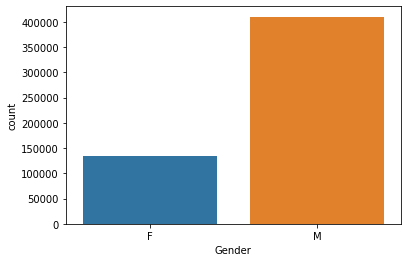

In [ ]:
sns.countplot(x='Gender', data=data_s)
pass

Посмотрев на данную диаграмму, можно сделать вывод, что мужчин больше в разы

# **Обработка пропущенных значений**

In [ ]:
data_s.isna().sum()


User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            170636
Product_Category_3            378588
Purchase                           0
dtype: int64

Диапозон пропущенных значений  в категориях (year, mileage, power, price)[277, 34441]. Заполним пропущенные значения, которые удовлетворяют условию >=605, медианой

In [ ]:
data_s["Product_Category_2"].fillna(data_s["Product_Category_2"].median(axis = 0), axis=0 , inplace=True)
data_s["Product_Category_3"].fillna(data_s["Product_Category_3"].median(axis = 0), axis=0 , inplace=True)


In [ ]:
data_s.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

# **Обработка категориальных значений**

In [ ]:
data_s.describe(include=['category'])

,Gender,Age,City_Category
count,544768,544768,544768
unique,2,7,3
top,M,26-35,B
freq,410285,217734,229334


Так как категориальный признак 'Gender' выражен в буквеной форме, то мы его закодируем

In [ ]:
data_s['Gender'] = pd.factorize(data_s['Gender'])[0]
data_s.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0-17,10,A,2.0,0,3,9.0,14.0,8370
1,1000001,P00248942,0,0-17,10,A,2.0,0,1,6.0,14.0,15200
2,1000001,P00087842,0,0-17,10,A,2.0,0,12,9.0,14.0,1422
3,1000001,P00085442,0,0-17,10,A,2.0,0,12,14.0,14.0,1057
4,1000002,P00285442,1,55+,16,C,4.0,0,8,9.0,14.0,7969


In [ ]:
del data['Age']
del data['City_Category']